<a href="https://colab.research.google.com/github/MHadavand/Lessons/blob/master/ML/NearestNeighbour/IntroductionAndExamples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction (Nearest Neighbor )

<font color="green">*Nearest neighbor*</font> is one of the oldest machine learning techniques that is often used for classification. The base idea is to find the closets data record(s) to a target data record based on a measure of distance. Euclidean distance is one the alternatives to define the distance which is one of the Minkowski distance ($L_p$ norms) options where p = 2.


$X = (x_1, x_2, x_3, ..., x_n) \;\;and\;\;  Y = (y_1, y_2, y_3, ..., y_n)$

$D(X,Y) = (\sum | x_i - y_i |^{p})^{\frac{1}{p}}$ 


Nearest neighbor can also be used to identify collocated data in a cartezian framework. The idea is very simple and there are different algorithm to make the calculation fast based (e.g. Ball Tree K-d Tree).

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import time
from ipywidgets import widgets, interactive

# Helper functions/classes

In [2]:
def image_plot(image, digit, cmap='bone_r', figsize=(5,5), ax=None):
    '''
    A function to plot images of hand written digits
    '''
    
    from matplotlib import pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    ax.text(0.1,0.92,'Label : {}'.format(digit), fontsize=10, color ='b', transform=ax.transAxes)
    _ = ax.imshow(image, cmap='bone_r')
    ax.set_axis_off()

def image_plot_check(image, predicted_digit, true_digit, cmap='bone_r', figsize=(6,6), ax=None):
    '''
    A function to plot images of hand written digits
    '''
    
    from matplotlib import pyplot as plt
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=figsize)
    
    color = 'g' if predicted_digit==true_digit else 'r'
    
    ax.text(0.1,0.92,'Predicted_Label : {}'.format(predicted_digit), fontsize=10, color =color, transform=ax.transAxes)
    _ = ax.imshow(image, cmap='bone_r')
    
    if predicted_digit!=true_digit:
        ax.text(0.7,0.92,'Correct_Label : {}'.format(true_digit), fontsize=10, color ='g', transform=ax.transAxes)
    ax.set_axis_off()

def get_squared_dist(x,y):
    '''
    computes squared Euclidean distance between two arrays
    '''
    return np.sum(np.square(x-y))

# MNIST Example

In this example, nearest neighbor is used to create a classifier that takes images of hand written digits and outputs a label between 0 and 9. MNIST data set is used for this example.

MNIST is a classic dataset in machine learning (the hello world example), consisting of 28x28 gray-scale images handwritten digits. The original training set contains 60,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

In [3]:
## Load the training set
train_data = np.load('../Data/MNIST/train_data.npy')
train_labels = np.load('../Data/MNIST/train_labels.npy')

## Load the testing set
test_data = np.load('../Data/MNIST/test_data.npy')
test_labels = np.load('../Data/MNIST/test_labels.npy')

In [4]:
print("Number of training images: ", np.shape(train_data)[0])
print("Number of testing images: ", np.shape(test_data)[0])

Number of training images:  7500
Number of testing images:  1000


## Visualizing the data set

Checking some training images

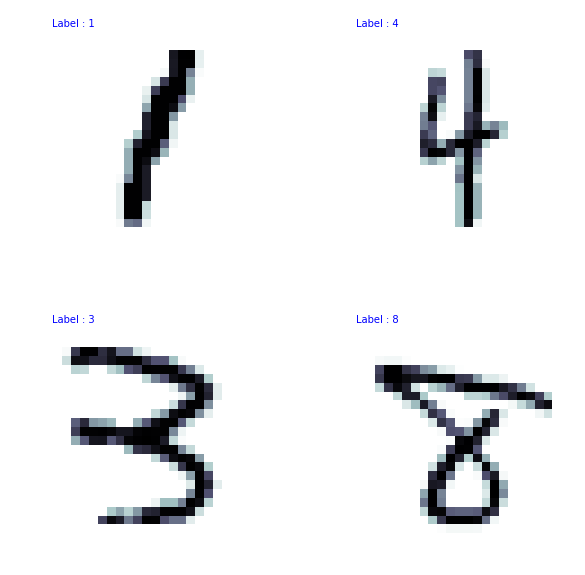

In [5]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes = axes.flatten()
idx = np.random.randint(0, len(train_labels), 4)
for i, ax in zip(idx,axes):
    # Note that the data has the flat image array that needs to be reshabed before being plotted
    image_plot(train_data[i].reshape(28,-1), train_labels[i], ax=ax)

## Choose distance function

One option is *Euclidean distance*: for two vectors $x, y \in \mathbb{R}^d$:

$$\|x - y\| = \sqrt{\sum_{i=1}^d (x_i - y_i)^2}.$$

The square root can be omitted as the distance is used as measure of relative distance, and simply compute _squared Euclidean distance_:

$$\|x - y\|^2 = \sum_{i=1}^d (x_i - y_i)^2.$$

For the purposes of nearest neighbor computations, the two are equivalent: for three vectors $x, y, z \in \mathbb{R}^d$, we have 

$\|x - y\| \leq \|x - z\|$ if and only if $\|x - y\|^2 \leq \|x - z\|^2$.

## Nearest neighbor based on squared Euclidean distance

In [6]:
def get_nn(input_image, reference_images, reference_labels):
    
    '''
    A naive algorithm to find the nearest neighbor without any sorting
    '''
    
    distances = [get_squared_dist(input_image, ref_image) for ref_image in reference_images]
    
    return reference_labels[np.argmin(distances)], np.argmin(distances)

In [7]:
test_image_index = widgets.BoundedIntText(
    value=1,
    min=1,
    max=len(test_labels)+1,
    step=1,
    description='Test Image Index:',
    disabled=False,
    color='black'
)

def check_test_image(test_image_index):
    """
    A widget to check test images
    """
    test_image_index = int(test_image_index) - 1
    
    predicted_digit, predicted_index = get_nn(test_data[test_image_index], train_data, train_labels)
    
    fig, axes = plt.subplots(1,2, figsize=(12,6))
    
    image_plot_check(test_data[test_image_index].reshape(28,-1), 
                     predicted_digit, true_digit = test_labels[test_image_index],
                     ax=axes[0])
    axes[0].set_title('Predcition')
    image_plot(train_data[predicted_index].reshape(28,-1), train_labels[predicted_index], ax=axes[1])
    axes[1].set_title('Nearest Neighbor Training Image')

In [8]:
interactive(check_test_image, test_image_index=test_image_index)

interactive(children=(BoundedIntText(value=1, description='Test Image Index:', max=1001, min=1), Output()), _d…

## Process all test images

Evaluate the performance of the naive nearest neighbor search and also calculate the test accuracy.

In [9]:
## Predict for each test image 
t_before = time.time()
test_predictions = [get_nn(test_data[i],train_data, train_labels)[0] for i in range(len(test_labels))]
t_after = time.time()

## Compute the accuracy
accuracy = np.equal(test_predictions, test_labels)
accuracy = float(np.sum(accuracy))/len(test_labels)

print("Accuracy of nearest neighbor classifier: %{:.2f}".format(accuracy*100))
print("Classification time (seconds): ", t_after - t_before)

Accuracy of nearest neighbor classifier: %95.40
Classification time (seconds):  73.07199048995972


# Improving the nearest neighbor performance

With the naive implementation of nearest neighbor, we need a full pass through the entire training set in order to classify one image. 

There are faster algorithm to perform nearest neighbor search that is based on preprocessing the training/reference data set. `scikit-learn` has two useful nearest neighbor search algorithms: the _ball tree_ and the _k-d tree_. 

## Ball Tree

In [10]:
from sklearn.neighbors import BallTree

# Build the hyper space partitioning structure (Hyper Spheres). 
t_before = time.time()
ball_tree = BallTree(train_data)
t_after = time.time()

print("Time to build the hyper space partitioning structure(seconds): ", t_after - t_before)

Time to build the hyper space partitioning structure(seconds):  1.5149927139282227


In [11]:
## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(ball_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute the accuracy
accuracy = np.equal(ball_tree_predictions, test_labels)
accuracy = float(np.sum(accuracy))/len(test_labels)

print("Accuracy of nearest neighbor classifier: %{:.2f}".format(accuracy*100))
print("Classification time (seconds): ", t_after - t_before)

Accuracy of nearest neighbor classifier: %95.40
Classification time (seconds):  9.658303499221802


AS can be seen above, the ball-tree search provides the same accuracy and is significantly faster than the naive nearest neighbor

## KDTree (k-dimensional tree)

In [12]:
from sklearn.neighbors import KDTree

In [13]:
# Build the hyper space partitioning structure. 
t_before = time.time()
kd_tree = KDTree(train_data, leaf_size=40, metric='minkowski', p=2)
t_after = time.time()

print("Time to build the hyper space partitioning structure(seconds): ", t_after - t_before)

Time to build the hyper space partitioning structure(seconds):  2.165998697280884


In [14]:
## Get nearest neighbor predictions on testing data
t_before = time.time()
test_neighbors = np.squeeze(kd_tree.query(test_data, k=1, return_distance=False))
ball_tree_predictions = train_labels[test_neighbors]
t_after = time.time()

## Compute the accuracy
accuracy = np.equal(ball_tree_predictions, test_labels)
accuracy = float(np.sum(accuracy))/len(test_labels)

print("Accuracy of nearest neighbor classifier: %{:.2f}".format(accuracy*100))
print("Classification time (seconds): ", t_after - t_before)

Accuracy of nearest neighbor classifier: %95.40
Classification time (seconds):  11.927953481674194


# Improving the nearest neighbor

One option is the use multiple nearest neighbors (i.e. KNN) and use the majority rule decision. K-Fold cross-validation analysis can be used to select the optimal number for K.

The better approach is to use the proper distance function. For example, for image classification like the MNIST example, Minkowski distances are proper choice as they are sensitive to moving/rotating the target object (e.g. hand written number) in the image. 

**Tangent distance** is not sensitive to small translations and rotations.

**Shape context**, can be used to handle a broader family of natural deformations.

Another distance function that is a metric is an edit distance that is the number of insertions, deletions and substitutions to get from instance X to instance y. This kind of distance function is particularly suitable for string arrays.